In [123]:
# data manipulation libraries
import pandas as pd
import json
import numpy as np

# os function calls
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# image processing
from PIL import Image

# preprocessing tools
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# feature selection
from sklearn import feature_selection

# classification models
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, svm, tree, discriminant_analysis
from xgboost import XGBClassifier

# model selection
from sklearn import model_selection

# keras
import keras
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, BatchNormalization, Input, Activation, GlobalAveragePooling2D, add
from keras.utils import multi_gpu_model, to_categorical
from keras.models import Model
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('./test/test.csv')
train.head()

lenTrain = len(train)

data = train.append(test)
data.head()

/home/jason/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,...,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100,...,Nibble,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0,...,No Name Yet,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0,...,Brisco,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150,...,Miko,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0
4,2.0,1,307,0,1,0,0,This handsome yet cute boy is up for adoption....,2,0,...,Hunter,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,1,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 0 to 3947
Data columns (total 24 columns):
AdoptionSpeed    14993 non-null float64
Age              18941 non-null int64
Breed1           18941 non-null int64
Breed2           18941 non-null int64
Color1           18941 non-null int64
Color2           18941 non-null int64
Color3           18941 non-null int64
Description      18927 non-null object
Dewormed         18941 non-null int64
Fee              18941 non-null int64
FurLength        18941 non-null int64
Gender           18941 non-null int64
Health           18941 non-null int64
MaturitySize     18941 non-null int64
Name             17381 non-null object
PetID            18941 non-null object
PhotoAmt         18941 non-null float64
Quantity         18941 non-null int64
RescuerID        18941 non-null object
State            18941 non-null int64
Sterilized       18941 non-null int64
Type             18941 non-null int64
Vaccinated       18941 non-null int64
VideoAmt  

In [4]:
# compare adoption speed between dogs and cats
train[['Type', 'AdoptionSpeed']].groupby('Type').mean()

,AdoptionSpeed
Type,
1,2.615101
2,2.399504


# There is a difference between cats and dogs in terms of adoption speed

In [5]:
# check name
print('Number of unique names: {0:d}'.format(len(data['Name'].unique())))

Number of unique names: 11106


In [6]:
# fill missing names
data['Name'].fillna('No Name Yet', inplace=True)
train['Name'] = data['Name'][:lenTrain]
test['Name'] = data['Name'][lenTrain:]

print('Number of pets with no name: {0:d}'.format(len(data.loc[data['Name']=='No Name Yet', 'Name'])))

Number of pets with no name: 1586


# Next we will look at whether certain names are more favourable

In [7]:
Names = pd.DataFrame(data=train['Name'].unique(), columns=['Name'])
Names['AdoptionSpeed'] = 10
Names['Count'] = 0 # count number of occurences of name

for name, obj in train[['AdoptionSpeed', 'Name']].groupby('Name'):
    Names.loc[Names['Name']==name, 'Count'] = len(obj)
    if (len(obj) > 4):
        Names.loc[Names['Name']==name, 'AdoptionSpeed'] = obj['AdoptionSpeed'].mean()

In [8]:
# names with fastest adoption speed
Names.sort_values(by=['AdoptionSpeed'])

,Name,AdoptionSpeed,Count
330,Shih Tzu,1.333333,9
188,Sweety,1.333333,6
4988,Tam Tam,1.400000,5
1329,Boboy,1.400000,5
1366,Tarzan,1.400000,5
1453,Suki,1.500000,6
437,Misty,1.571429,7
2112,Didi,1.600000,5
30,Comel,1.714286,7
283,Baby Girl,1.800000,5


In [9]:
# most popular names
Names.sort_values(by=['Count'], ascending=False)

,Name,AdoptionSpeed,Count
1,No Name Yet,2.594214,1279
170,Baby,2.757576,66
316,Lucky,2.343750,64
14,Brownie,2.574074,54
23,No Name,2.481481,54
96,Mimi,2.442308,52
15,Blackie,2.387755,49
268,Puppy,2.888889,45
331,Kittens,2.589744,39
7,Kitty,2.282051,39


# It seems there are many odd names and people generally don't care about what to put in the name section. Conclude that name might not be important

# Check age relevance

In [10]:
Age = pd.DataFrame(data=train['Age'].unique(), columns=['Age'])
Age.head()

,Age
0,3
1,1
2,4
3,12
4,0


In [11]:
Age['AdoptionSpeed'] = 10
Age['Count'] = 0 # count number of occurences of name

for age, obj in train[['AdoptionSpeed', 'Age']].groupby('Age'):
    Age.loc[Age['Age']==age, 'Count'] = len(obj)
    if (len(obj) > 4):
        Age.loc[Age['Age']==age, 'AdoptionSpeed'] = obj['AdoptionSpeed'].mean()
        
Age

,Age,AdoptionSpeed,Count
0,3,2.458800,1966
1,1,2.192708,2304
2,4,2.630298,1109
3,12,2.883144,967
4,0,2.229050,179
5,2,2.264916,3503
6,78,2.800000,5
7,6,2.801075,558
8,8,2.932039,309
9,10,2.753086,162


In [12]:
data['AgeBin'] = pd.qcut(data['Age'], 7, duplicates='drop')
train['AgeBin'] = data['AgeBin'][:lenTrain]
test['AgeBin'] = data['AgeBin'][lenTrain:]
train[['AgeBin', 'AdoptionSpeed']].groupby('AgeBin').mean()

,AdoptionSpeed
AgeBin,
"(-0.001, 1.0]",2.195328
"(1.0, 2.0]",2.264916
"(2.0, 3.0]",2.458800
"(3.0, 4.0]",2.630298
"(4.0, 9.0]",2.786715
"(9.0, 24.0]",2.849432
"(24.0, 255.0]",2.726801


# Age does have an impact on adoption speed, the older the longer

In [13]:
labelencode = LabelEncoder()
train['AgeBin_Code'] = labelencode.fit_transform(train['AgeBin'])
test['AgeBin_Code'] = labelencode.fit_transform(test['AgeBin'])

test[['AgeBin', 'AgeBin_Code']].head(50)

,AgeBin,AgeBin_Code
0,"(1.0, 2.0]",1
1,"(9.0, 24.0]",5
2,"(9.0, 24.0]",5
3,"(4.0, 9.0]",4
4,"(4.0, 9.0]",4
5,"(9.0, 24.0]",5
6,"(9.0, 24.0]",5
7,"(9.0, 24.0]",5
8,"(9.0, 24.0]",5
9,"(2.0, 3.0]",2


In [14]:
train.loc[train['Breed2']==0, 'Breed2'].count()

10762

In [15]:
train[['Age','Breed1', 'Breed2']].groupby(['Breed1', 'Breed2']).count().quantile(0.99)

Age    120.89
Name: 0.99, dtype: float64

# Check adoption rate for mixed vs pure breeds

In [16]:
data['Mix'] = 0
data.loc[(data['Breed2']==307) | (data['Breed1']==307), 'Mix'] = 1

train['Mix'] = data['Mix'][:lenTrain]
test['Mix'] = data['Mix'][lenTrain:]

train[['AdoptionSpeed', 'Mix']].groupby('Mix').mean()

,AdoptionSpeed
Mix,
0,2.352673
1,2.721846


# Difference is significant

# Adoption rate of different breeds

In [17]:
Breed1 = pd.DataFrame(data=train['Breed1'].copy(deep=True), columns=['Breed1'])
Breed1['Count'] = 0

for name, obj in train[['AdoptionSpeed', 'Breed1']].groupby('Breed1'):
    Breed1.loc[Breed1['Breed1']==name, 'Count'] = len(obj)
    
Breed1['Count'].describe()

#Breed1 = pd.DataFrame(data=train['Breed1'].copy(deep=True), columns=['Breed1'])
#Breed1.groupby(['Breed1']).

count    14993.000000
mean      3368.399853
std       2425.671780
min          1.000000
25%        296.000000
50%       3634.000000
75%       5927.000000
max       5927.000000
Name: Count, dtype: float64

# Decide arbitrarily that if number of occurrences <= 100, count it as a rare breed

In [18]:
data['Rare'] = 0
for name, obj in data.groupby(['Breed1', 'Breed2']):
    if (len(obj)<=100):
        data.loc[(data['Breed1']==name[0]) & (data['Breed2']==name[1]), 'Rare'] = 1

train['Rare'] = data['Rare'][:lenTrain]
test['Rare'] = data['Rare'][lenTrain:]
train[['Rare', 'AdoptionSpeed']].groupby('Rare').mean()

,AdoptionSpeed
Rare,
0,2.585862
1,2.318158


In [19]:
train.loc[train['Rare']==1, 'Rare'].count()

3888

# Rare breeds get adopted at a higher rate

In [20]:
fileListTrain = os.listdir('train_sentiment')
print(fileListTrain[:20])
fileListTest = os.listdir('test_sentiment')
print(fileListTest[:20])

['c8779a4a1.json', '0e1a2937a.json', 'b356b0f05.json', 'd33840dfa.json', '95d2a0bdf.json', 'cc08b4198.json', 'b9314a12d.json', '6326958d4.json', '3a1f2a306.json', '27e318160.json', 'b660cb310.json', '5507b63ab.json', '81af50144.json', 'e40290fa0.json', 'e9b1363e5.json', '851302ab1.json', '58a414b45.json', '8c28914a9.json', '69c1801cb.json', '3e946254a.json']
['8ec13a66e.json', 'f151b8040.json', '8f1e51824.json', '340ecb533.json', 'a5c61707b.json', '6ab539629.json', '77e601459.json', 'b80dfae6a.json', '257e363e0.json', '90d28943c.json', 'cd457aba8.json', '25ff67233.json', '4e83295b8.json', '122e7c0c2.json', '5b1b64fc6.json', 'd32ca0658.json', '7f01bc6e5.json', '449b0cbdc.json', '97fe38408.json', 'f857fda99.json']


In [21]:
fileOpenTrain = open('train_sentiment/' + fileListTrain[0])
jsonDataTrain = json.load(fileOpenTrain)
print(jsonDataTrain['documentSentiment'])
fileOpenTrain.close()

{'magnitude': 2.1, 'score': 0.2}


In [22]:
data['magnitude'] = np.nan
data['score'] = np.nan

for file in fileListTrain:
    # open each file and get their magnitude and scores
    fileOpenTrain = open('train_sentiment/' + file)
    jsonData = json.load(fileOpenTrain)['documentSentiment']
    data.loc[data['PetID']==file.split('.')[0], 'magnitude'] = jsonData['magnitude']
    data.loc[data['PetID']==file.split('.')[0], 'score'] = jsonData['score']
    fileOpenTrain.close()
    
for file in fileListTest:
    # open each file and get their magnitude and scores
    fileOpenTest = open('test_sentiment/' + file)
    jsonData = json.load(fileOpenTest)['documentSentiment']
    data.loc[data['PetID']==file.split('.')[0], 'magnitude'] = jsonData['magnitude']
    data.loc[data['PetID']==file.split('.')[0], 'score'] = jsonData['score']
    fileOpenTest.close()

data['magnitude'].fillna(data['magnitude'].mean(), inplace=True)
data['score'].fillna(data['score'].mean(), inplace=True)

meanMag = data['magnitude'].mean()
stdMag = data['magnitude'].std()

meanSco = data['score'].mean()
stdSco = data['score'].std()

data.loc[data['magnitude'] > (meanMag+3*stdMag), 'magnitude'] = meanMag + 3*stdMag
data.loc[data['score'] < (meanSco-3*stdSco) , 'score'] = meanSco - 3*stdSco
    
train[['magnitude', 'score']] = data[['magnitude', 'score']][:lenTrain]
test[['magnitude', 'score']] = data[['magnitude', 'score']][lenTrain:]
test[['magnitude', 'score']].describe()

,magnitude,score
count,3948.000000,3948.000000
mean,2.174706,0.288845
std,1.691144,0.274252
min,0.000000,-0.535359
25%,0.900000,0.100000
50%,1.900000,0.282511
75%,3.000000,0.400000
max,8.116820,0.900000


In [23]:
data[['AdoptionSpeed', 'magnitude']].groupby('magnitude').mean()

,AdoptionSpeed
magnitude,
0.000000,2.370805
0.100000,2.346835
0.200000,2.661376
0.300000,2.721591
0.400000,2.512281
0.500000,2.660436
0.600000,2.681250
0.700000,2.492537
0.800000,2.490939


In [24]:
data['MagBin'] = pd.qcut(data['magnitude'], 6, duplicates='drop')
data[['MagBin', 'AdoptionSpeed']].groupby('MagBin').mean()
data['MagBin_Code'] = labelencode.fit_transform(data['MagBin'])

train['MagBin_Code'] = data['MagBin_Code'][:lenTrain]
test['MagBin_Code'] = data['MagBin_Code'][lenTrain:]

data[['MagBin_Code','MagBin']].head()

,MagBin_Code,MagBin
0,4,"(2.3, 3.5]"
1,1,"(0.6, 1.1]"
2,5,"(3.5, 8.117]"
3,1,"(0.6, 1.1]"
4,5,"(3.5, 8.117]"


In [25]:
data['ScoBin'] = pd.qcut(train['score'], 3)
data[['ScoBin', 'AdoptionSpeed']].groupby('ScoBin').mean()
data['ScoBin_Code'] = labelencode.fit_transform(data['ScoBin'])

train['ScoBin_Code'] = data['ScoBin_Code'][:lenTrain]
test['ScoBin_Code'] = data['ScoBin_Code'][lenTrain:]

data[['ScoBin', 'ScoBin_Code']].head()

,ScoBin,ScoBin_Code
0,"(0.1, 0.4]",1
1,"(-0.536, 0.1]",0
2,"(0.1, 0.4]",1
3,"(0.4, 0.9]",2
4,"(0.4, 0.9]",2


In [26]:
train.columns.values

array(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'AgeBin', 'AgeBin_Code', 'Mix', 'Rare',
       'magnitude', 'score', 'MagBin_Code', 'ScoBin_Code'], dtype=object)

In [27]:
# maturity size
data[['MaturitySize', 'AdoptionSpeed']].groupby('MaturitySize').mean()

,AdoptionSpeed
MaturitySize,
1,2.357879
2,2.576904
3,2.458730
4,2.151515


In [28]:
# fur length
data[['FurLength', 'AdoptionSpeed']].groupby('FurLength').mean()

,AdoptionSpeed
FurLength,
1,2.585263
2,2.470435
3,2.080097


In [29]:
# vaccinated
# convert all "not sures" into yes
data.loc[data['Vaccinated']==3, 'Vaccinated'] = 1

train['Vaccinated'] = data['Vaccinated'][:lenTrain]
test['Vaccinated'] = data['Vaccinated'][lenTrain:]

data[['Vaccinated', 'AdoptionSpeed']].groupby('Vaccinated').describe()

AdoptionSpeed                                             
                   count      mean       std  min  25%  50%  75%  max
Vaccinated                                                           
1                 7766.0  2.660185  1.170590  0.0  2.0  3.0  4.0  4.0
2                 7227.0  2.361976  1.164867  0.0  1.0  2.0  3.0  4.0

In [30]:
# dewormed
# convert all "not sures" into yes
data.loc[data['Dewormed']==3, 'Dewormed'] = 1

train['Dewormed'] = data['Dewormed'][:lenTrain]
test['Dewormed'] = data['Dewormed'][lenTrain:]

data[['Dewormed', 'AdoptionSpeed']].groupby('Dewormed').describe()

AdoptionSpeed                                             
                 count      mean       std  min  25%  50%  75%  max
Dewormed                                                           
1              10178.0  2.576636  1.165601  0.0  2.0  3.0  4.0  4.0
2               4815.0  2.389200  1.191704  0.0  1.0  2.0  4.0  4.0

In [31]:
# sterilised
# convert all "not sures" into no
#data.loc[data['Sterilized']==3, 'Sterilized'] = 2

train['Sterilized'] = data['Sterilized'][:lenTrain]
test['Sterilized'] = data['Sterilized'][lenTrain:]

data[['Sterilized', 'AdoptionSpeed']].groupby('Sterilized').describe()

AdoptionSpeed                                             
                   count      mean       std  min  25%  50%  75%  max
Sterilized                                                           
1                 3101.0  2.902290  1.136405  0.0  2.0  3.0  4.0  4.0
2                10077.0  2.361715  1.136503  0.0  1.0  2.0  3.0  4.0
3                 1815.0  2.716253  1.282756  0.0  2.0  3.0  4.0  4.0

In [32]:
# health
# convert all "not sures" into healthy
#data.loc[data['Health']==0, 'Health'] = 1

train['Health'] = data['Health'][:lenTrain]
test['Health'] = data['Health'][lenTrain:]

data[['Health', 'AdoptionSpeed']].groupby('Health').describe()

AdoptionSpeed                                              
               count      mean       std  min   25%  50%  75%  max
Health                                                            
1            14478.0  2.510499  1.175135  0.0  2.00  2.0  4.0  4.0
2              481.0  2.659044  1.233291  0.0  2.00  3.0  4.0  4.0
3               34.0  3.029412  1.058452  0.0  2.25  3.0  4.0  4.0

In [33]:
# quantity
data['Quantity'].describe()

# rescale quantity to maximum 3 times std
meanQuant = data['Quantity'].mean()
stdQuant = data['Quantity'].std()

data.loc[data['Quantity'] > (meanQuant + 3 * stdQuant), 'Quantity'] = int(meanQuant + 3 * stdQuant)

train['Quantity'] = data['Quantity'][:lenTrain]
test['Quantity'] = data['Quantity'][lenTrain:]

data['Quantity'].describe()

count    18941.000000
mean         1.532126
std          1.182183
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Quantity, dtype: float64

In [34]:
data[['Quantity', 'AdoptionSpeed']].groupby('Quantity').count()

,AdoptionSpeed
Quantity,
1,11565
2,1422
3,726
4,531
5,333
6,416


In [35]:
# create new column called "Many"
# denote whether it is a single pet or multiple pets
data['Many'] = 0
data.loc[data['Quantity'] > 1, 'Many'] = 1

train['Many'] = data['Many'][:lenTrain]
test['Many'] = data['Many'][lenTrain:]

data[['Many', 'AdoptionSpeed']].groupby('Many').mean()

,AdoptionSpeed
Many,
0,2.485171
1,2.621937


In [36]:
train.columns.values

array(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'AgeBin', 'AgeBin_Code', 'Mix', 'Rare',
       'magnitude', 'score', 'MagBin_Code', 'ScoBin_Code', 'Many'],
      dtype=object)

In [37]:
# fee
data[['Fee', 'AdoptionSpeed']].groupby('Fee').count()

# create free variable
data['free'] = 1
data.loc[data['Fee'] > 0, 'free'] = 0

train['free'] = data['free'][:lenTrain]
test['free'] = data['free'][lenTrain:]

train[['free', 'AdoptionSpeed']].groupby('free').mean()

,AdoptionSpeed
free,
0,2.569528
1,2.506673


# Free pets and non-free pets are not very different in adoption rates

In [38]:
train[['Fee', 'AdoptionSpeed']].groupby('Fee').mean()

# create fee bins
data['FeeBin'] = pd.qcut(data['Fee'], 30, duplicates='drop')

data[['FeeBin', 'AdoptionSpeed']].groupby('FeeBin').mean()

,AdoptionSpeed
FeeBin,
"(-0.001, 30.0]",2.507622
"(30.0, 50.0]",2.513078
"(50.0, 100.0]",2.761628
"(100.0, 200.0]",2.556064
"(200.0, 3000.0]",2.453901


In [39]:
data['FeeBin_Code'] = labelencode.fit_transform(data['FeeBin'])

train['FeeBin_Code'] = data['FeeBin_Code'][:lenTrain]
test['FeeBin_Code'] = data['FeeBin_Code'][lenTrain:]

data[['FeeBin_Code','AdoptionSpeed']].groupby('FeeBin_Code').mean()

,AdoptionSpeed
FeeBin_Code,
0,2.507622
1,2.513078
2,2.761628
3,2.556064
4,2.453901


In [40]:
# state
print(data[['State', 'AdoptionSpeed']].groupby('State').mean().sort_values(by='AdoptionSpeed'))
print(data[['State', 'AdoptionSpeed']].groupby('State').count())
print(len(data[['State', 'AdoptionSpeed']].groupby('State').count()))

       AdoptionSpeed
State               
41335       2.317647
41367       2.400000
41336       2.410256
41326       2.452031
41401       2.540182
41345       2.545455
41361       2.576923
41325       2.681818
41327       2.781732
41330       2.821429
41332       2.845850
41415       3.000000
41324       3.065693
41342       3.307692
       AdoptionSpeed
State               
41324            137
41325            110
41326           8714
41327            843
41330            420
41332            253
41335             85
41336            507
41342             13
41345             22
41361             26
41367             15
41401           3845
41415              3
14


In [41]:
# recode state values to make states similar in adoption speed next to each other
def mapping(x):
    if (x==41335):
        return 0
    elif (x==41367):
        return 1
    elif (x==41336):
        return 2
    elif (x==41326):
        return 3
    elif (x==41401):
        return 4
    elif (x==41345):
        return 5
    elif (x==41361):
        return 6
    elif (x==41325 or x==41380):
        return 7
    elif (x==41327):
        return 8
    elif (x==41330):
        return 9
    elif (x==41332):
        return 10
    elif (x==41415):
        return 11
    elif (x==41324):
        return 12
    elif (x==41342):
        return 13
    return x
    
data['StateEncode'] = -1
data['StateEncode'] = data['State'].apply(mapping)

In [42]:
data[['StateEncode', 'State']].head()

,StateEncode,State
0,3,41326
1,4,41401
2,3,41326
3,4,41401
4,3,41326


In [43]:
# rescuerID
data['RescuerID'].unique()

array(['8480853f516546f6cf33aa88cd76c379',
       '3082c7125d8fb66f7dd4bff4192c8b14',
       'fa90fa5b1ee11c86938398b60abc32cb', ...,
       '6579dccca41e0b87d88f9e9213523280',
       '2ef4c4bde6e0d6f61ce8f6d2c5f37ec8',
       'e93d16367aa91743ef802fc6590f0b31'], dtype=object)

In [44]:
# video amount
data[['VideoAmt', 'AdoptionSpeed']].groupby('VideoAmt').count().sort_values(by='AdoptionSpeed')

data['HasVideo'] = 0
data.loc[data['VideoAmt'] > 0, 'HasVideo'] = 1

train['HasVideo'] = data['HasVideo'][:lenTrain]
test['HasVideo'] = data['HasVideo'][lenTrain:]

data[['HasVideo', 'AdoptionSpeed']].groupby('HasVideo').mean()

,AdoptionSpeed
HasVideo,
0,2.519176
1,2.447735


In [45]:
data[['PhotoAmt', 'AdoptionSpeed']].groupby('PhotoAmt').count()

,AdoptionSpeed
PhotoAmt,
0.0,341
1.0,3075
2.0,2518
3.0,2511
4.0,1881
5.0,2147
6.0,621
7.0,432
8.0,314


# Train images

In [90]:
# create cross-validation split
cv_split = model_selection.StratifiedShuffleSplit(n_splits=10, test_size = 0.2, train_size = 0.8, random_state = 0)

#imageArray = np.array([np.array(Image.open('train_images/' + imagePath).resize((224,224))) for imagePath in imageList])
imageArray = []
imageLabels = []
imageList = os.listdir('train_images')

for imagePath in imageList:
    img = Image.open('train_images/' + imagePath)
    img = img.resize((224,224)) # make all images the same size
    if (np.array(img).shape==(224,224,3)):
        imageArray.append(np.array(img))
        petId = imagePath.split('-')[0] # obtain pet ID
        imageLabels.append(train.loc[train['PetID']==petId, 'AdoptionSpeed'].values[0])

In [95]:
imageArray = np.array([imageArray[i] for i in range(len(imageArray))])
imageLabels = np.array([imageLabels[i] for i in range(len(imageLabels))])

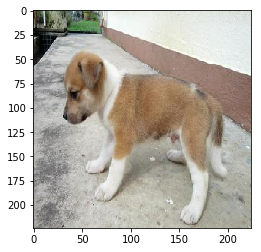

In [103]:
plt.imshow(imageArray[0])

In [97]:
Y_imageLabels = to_categorical(imageLabels, num_classes=5)

print(Y_imageLabels[:10])
print(imageLabels[:10])

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
[2 4 1 4 2 4 3 3 2 3]


In [98]:
imageList[:20]

['21206933c-14.jpg',
 '5792107ef-1.jpg',
 '20e75472d-1.jpg',
 'a24bb77d1-3.jpg',
 '1ff148919-1.jpg',
 '5c1fa6bd2-6.jpg',
 '35c9336dc-3.jpg',
 '08006836a-2.jpg',
 '2d572bc20-2.jpg',
 'd4e83ee5b-8.jpg',
 '3b4f31dc0-1.jpg',
 '6eee0e191-3.jpg',
 '7b0d325d8-3.jpg',
 '018188075-4.jpg',
 'd17892c89-2.jpg',
 '9d9197e7e-3.jpg',
 '9bcd62ef1-1.jpg',
 '036af6df3-12.jpg',
 '27e318160-1.jpg',
 'ba2d4e877-1.jpg']

In [99]:
imageArray.shape

(58283, 224, 224, 3)

In [124]:
# build model

def buildModel():
    
    X_input = Input((224, 224, 3))
    
    # create model using resnet theory
    # (112, 112)
    X = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(X_input)
    X = BatchNormalization()(X)
    
    
    
    # (56, 56)
    X = Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=16, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=16, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    # (28, 28)
    X = Conv2D(filters=32, kernel_size=(1,1), strides=2, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same')(X)
    # change in dimensions hence need to project appropriately
    X_shortcut = Conv2D(filters=128, kernel_size=(1,1), strides=2, padding='same')(X_shortcut)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=32, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=32, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    # (14, 14)
    X = Conv2D(filters=64, kernel_size=(1,1), strides=2, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=256, kernel_size=(1,1), strides=1, padding='same')(X)
    # change in dimensions hence need to project appropriately
    X_shortcut = Conv2D(filters=256, kernel_size=(1,1), strides=2, padding='same')(X_shortcut)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=256, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=256, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X_shortcut = X
    
    X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv2D(filters=256, kernel_size=(1,1), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = add([X, X_shortcut])
    X = Activation('relu')(X)
    X = BatchNormalization()(X)
    
    X = GlobalAveragePooling2D()(X)
    
    output = Dense(5, activation='softmax')(X)
    
    model = Model(inputs=X_input, outputs=output)
    
    return model

In [105]:
# create data generator

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True)

X_batch, y_batch = datagen.flow(imageArray, Y_imageLabels, batch_size = 28)

X_batch[:5]

MemoryError: 

In [125]:
# train model on data

model = buildModel()

model = multi_gpu_model(model, gpus=2)

reduceLR = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=0)
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.9, decay=0.0001, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [126]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 224, 224, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 5)            434885      lambda_1[0][0]                   
                                                                 lambda_2[0][0]                   
__________

In [130]:
model.fit(x = imageArray, y = Y_imageLabels, batch_size=256, epochs=65, initial_epoch=50, callbacks=[reduceLR])

Epoch 51/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.2124 - acc: 0.9319
Epoch 52/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1927 - acc: 0.9415
Epoch 53/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1860 - acc: 0.9431
Epoch 54/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1742 - acc: 0.9474
Epoch 55/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1684 - acc: 0.9523
Epoch 56/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1524 - acc: 0.9570
Epoch 57/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1553 - acc: 0.9570
Epoch 58/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1487 - acc: 0.9578
Epoch 59/65
58283/58283 [==============================] - 79s 1ms/step - loss: 0.1354 - acc: 0.9638
Epoch 60/65
58283/58283 [==============================] - 78s 1ms/step - loss: 0.1343 - ac

In [131]:
model.save_weights('image_predictor.h5')

In [ ]:
# picture amount
data[['PhotoAmt', 'AdoptionSpeed']].groupby('PhotoAmt').count().sort_values(by='AdoptionSpeed')

data['PhotoBin'] = pd.qcut(data['PhotoAmt'], 5)
data[['PhotoBin', 'AdoptionSpeed']].groupby('PhotoBin').mean()

data['PhotoBin_Code'] = labelencode.fit_transform(data['PhotoBin'])

train['PhotoBin_Code'] = data['PhotoBin_Code'][:lenTrain]
test['PhotoBin_Code'] = data['PhotoBin_Code'][lenTrain:]

data[['PhotoBin_Code', 'PhotoBin']].head(10)

In [ ]:
# colours
print(len(data.loc[data['Color1']>0, 'Color1']))
print(len(data.loc[data['Color2']>0, 'Color2']))
print(len(data.loc[data['Color3']>0, 'Color3']))

In [ ]:
print(data[['Color1', 'AdoptionSpeed']].groupby('Color1').mean())
print(data[['Color2', 'AdoptionSpeed']].groupby('Color2').mean())
print(data[['Color3', 'AdoptionSpeed']].groupby('Color3').mean())

In [ ]:
# multi-colour vs single-colour
data['MultiColor'] = 1
data.loc[(data['Color2']==0) & (data['Color3']==0), 'MultiColor'] = 0

data[['MultiColor', 'AdoptionSpeed']].groupby('MultiColor').mean()

In [ ]:
train.columns.values

In [ ]:
# remove unneccessary columns
removeCol = ['Name', 'Age', 'Fee', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'Description', 'PetID', 'AgeBin', 'magnitude', 'score', 'free', 'Quantity', ]

X_train = train.drop(removeCol, axis=1).drop('AdoptionSpeed', axis=1)
Y_train_org = train['AdoptionSpeed']#.to_numpy().reshape((-1, 1))

X_test = test.drop(removeCol, axis=1)
X_test_id = test['PetID']

print(X_train[:10])
print(Y_train_org[:10])
print(X_test[:10])
print(X_test_id[:10])

In [ ]:
Y_train = to_categorical(Y_train_org, dtype='int32')

print(Y_train[:10])

In [ ]:
submission = pd.read_csv('./test/sample_submission.csv')
submission.head()

In [ ]:
# create cross-validation split
cv_split = model_selection.StratifiedShuffleSplit(n_splits=10, test_size = 0.2, train_size = 0.8, random_state = 0)

In [ ]:
# perform regression to shrink input size=
#kNeighbor = neighbors.KNeighborsClassifier()
#dtree = tree.DecisionTreeClassifier()
#adaboost = ensemble.AdaBoostClassifier()
gradientboost = ensemble.GradientBoostingClassifier()
# obtain results prior to feature selection
base_results = model_selection.cross_validate(gradientboost, X=X_train, y=Y_train_org, scoring='accuracy', cv=cv_split, n_jobs=-1, return_train_score=True)

print('Number of parameters before feature selection: ', len(X_train.columns.values))
print('Training accuracy: ', np.mean(base_results['train_score']))
print('Testing accuracy: ', np.mean(base_results['test_score']))
print('Testing accuracy std: ', np.std(base_results['test_score']))
print('-'*20)

selector = feature_selection.RFECV(gradientboost, cv=cv_split, n_jobs=-1)
X_rfe_train = selector.fit_transform(X_train, Y_train_org)

feature_selected_results = model_selection.cross_validate(gradientboost, X=X_rfe_train, y=Y_train_org, scoring='accuracy', cv=cv_split, n_jobs=-1, return_train_score=True)

print('Number of parameters after feature selection: ', len(X_rfe_train[0]))
print('Training accuracy: ', np.mean(feature_selected_results['train_score']))
print('Testing accuracy: ', np.mean(feature_selected_results['test_score']))
print('Testing accuracy std: ', np.std(feature_selected_results['test_score']))

In [ ]:
# create array of models to test
Model = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    neighbors.KNeighborsClassifier(),
    neighbors.NearestCentroid(),
    
    neural_network.MLPClassifier(),
    
    svm.LinearSVC(),
    svm.SVC(probability=True),
    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    XGBClassifier()
]

In [ ]:
# run models to compare accuracy

Model_compare = pd.DataFrame(columns = ['Model Name', 'Train Accuracy', 'Test Accuracy', 'Test Accuracy std', 'Run Time'])
row = 0

for alg in Model:
    Model_name = alg.__class__.__name__
    Model_compare.loc[row, 'Model Name'] = Model_name
    
    cv_results = model_selection.cross_validate(alg, X=X_train, y=Y_train_org, scoring='accuracy', cv=cv_split, n_jobs=-1, return_train_score=True)
    
    Model_compare.loc[row, 'Train Accuracy'] = np.mean(cv_results['train_score'])
    Model_compare.loc[row, 'Test Accuracy'] = np.mean(cv_results['test_score'])
    Model_compare.loc[row, 'Test Accuracy std'] = np.std(cv_results['train_score'])
    Model_compare.loc[row, 'Run Time'] = np.mean(cv_results['fit_time'])
    
    row = row + 1
    
Model_compare.sort_values(by='Test Accuracy', ascending=False, inplace=True)

In [ ]:
Model_compare

In [ ]:
# only take top 5 algorithms to do parameter search
grid_param = [
    {
        # GradientBoostingClassifier
        'learning_rate' : [0.01], #[0.01, 0.03, 0.1, 0.3, 1],
        'n_estimators' : [200], #[50, 100, 200],
        'max_depth': [9], #[3, 6, 9, 12],
        'max_features': ['log2'] #['auto', 'log2']
    },
    
    {
        # XGBClassifier
        'learning_rate' : [0.1], #[0.01, 0.03, 0.1, 0.3, 1],
        'n_estimators' : [100], #[50, 100, 200],
        'max_depth': [6], #[3, 6, 9, 12],
        'n_jobs': [-1],
        'tree_method': ['gpu_exact'],
        'objective': ['multi:softmax'],
        'num_class': [5]
    },
    
    {
        # LinearDiscriminantAnalysis
        'solver': ['svd'] #['svd', 'lsqr', 'eigen']
    },
    
    {
        #AdaBoostClassifier
        'n_estimators' : [200], #[10, 20, 50, 100, 200],
        'learning_rate' : [0.3] #[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
    },
    
    {
        #RidgeClassifierCV
        'alphas': [[0.01, 0.03, 0.1, 0.3, 1]],
        'fit_intercept': [True], #[True, False],
        'normalize': [True],
        'cv': [cv_split],
        'class_weight': [None] #[None, 'balanced']
    }
]

In [ ]:
Best_model_compare = pd.DataFrame(columns = ['Model Name', 'Train Accuracy', 'Test Accuracy', 'Test Accuracy std', 'Run Time'])

In [ ]:
# set up grid search
gradientBoosting = ensemble.GradientBoostingClassifier()

gridSearch = model_selection.GridSearchCV(gradientBoosting, param_grid=grid_param[0], scoring='accuracy', n_jobs=-1, cv=cv_split, return_train_score=True)

gridSearch.fit(X_rfe_train, Y_train_org)

print('Best params: ', gridSearch.best_params_)
print('Training accuracy: ', gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_])
print('Testing accuracy: ', gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_])

Best_model_compare.loc[0, 'Model Name'] = gradientBoosting.__class__.__name__
Best_model_compare.loc[0, 'Train Accuracy'] = gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_]
Best_model_compare.loc[0, 'Test Accuracy'] = gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_]
Best_model_compare.loc[0, 'Test Accuracy std'] = gridSearch.cv_results_['std_test_score'][gridSearch.best_index_]
Best_model_compare.loc[0, 'Run Time'] = gridSearch.cv_results_['mean_fit_time'][gridSearch.best_index_]

In [ ]:
gradientBoosting.set_params(**gridSearch.best_params_)

In [ ]:
# set up grid search
XGBoost = XGBClassifier()

gridSearch = model_selection.GridSearchCV(XGBoost, param_grid=grid_param[1], scoring='accuracy', n_jobs=-1, cv=cv_split, return_train_score=True)

gridSearch.fit(X_rfe_train, Y_train_org)

print('Best params: ', gridSearch.best_params_)
print('Training accuracy: ', gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_])
print('Testing accuracy: ', gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_])

Best_model_compare.loc[1, 'Model Name'] = XGBoost.__class__.__name__
Best_model_compare.loc[1, 'Train Accuracy'] = gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_]
Best_model_compare.loc[1, 'Test Accuracy'] = gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_]
Best_model_compare.loc[1, 'Test Accuracy std'] = gridSearch.cv_results_['std_test_score'][gridSearch.best_index_]
Best_model_compare.loc[1, 'Run Time'] = gridSearch.cv_results_['mean_fit_time'][gridSearch.best_index_]

In [ ]:
XGBoost.set_params(**gridSearch.best_params_)

In [ ]:
# set up grid search
linearDis = discriminant_analysis.LinearDiscriminantAnalysis()

gridSearch = model_selection.GridSearchCV(linearDis, param_grid=grid_param[2], scoring='accuracy', n_jobs=-1, cv=cv_split, return_train_score=True)

gridSearch.fit(X_rfe_train, Y_train_org)

print('Best params: ', gridSearch.best_params_)
print('Training accuracy: ', gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_])
print('Testing accuracy: ', gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_])

Best_model_compare.loc[2, 'Model Name'] = XGBoost.__class__.__name__
Best_model_compare.loc[2, 'Train Accuracy'] = gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_]
Best_model_compare.loc[2, 'Test Accuracy'] = gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_]
Best_model_compare.loc[2, 'Test Accuracy std'] = gridSearch.cv_results_['std_test_score'][gridSearch.best_index_]
Best_model_compare.loc[2, 'Run Time'] = gridSearch.cv_results_['mean_fit_time'][gridSearch.best_index_]

In [ ]:
linearDis.set_params(**gridSearch.best_params_)

In [ ]:
# set up grid search
adaBoost = ensemble.AdaBoostClassifier()

gridSearch = model_selection.GridSearchCV(adaBoost, param_grid=grid_param[3], scoring='accuracy', n_jobs=-1, cv=cv_split, return_train_score=True)

gridSearch.fit(X_rfe_train, Y_train_org)

print('Best params: ', gridSearch.best_params_)
print('Training accuracy: ', gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_])
print('Testing accuracy: ', gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_])

Best_model_compare.loc[3, 'Model Name'] = XGBoost.__class__.__name__
Best_model_compare.loc[3, 'Train Accuracy'] = gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_]
Best_model_compare.loc[3, 'Test Accuracy'] = gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_]
Best_model_compare.loc[3, 'Test Accuracy std'] = gridSearch.cv_results_['std_test_score'][gridSearch.best_index_]
Best_model_compare.loc[3, 'Run Time'] = gridSearch.cv_results_['mean_fit_time'][gridSearch.best_index_]

In [ ]:
adaBoost.set_params(**gridSearch.best_params_)

In [ ]:
# set up grid search
ridge = linear_model.RidgeClassifierCV()

gridSearch = model_selection.GridSearchCV(ridge, param_grid=grid_param[4], scoring='accuracy', n_jobs=-1, cv=cv_split, return_train_score=True)

gridSearch.fit(X_rfe_train, Y_train_org)

print('Best params: ', gridSearch.best_params_)
print('Training accuracy: ', gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_])
print('Testing accuracy: ', gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_])

Best_model_compare.loc[4, 'Model Name'] = XGBoost.__class__.__name__
Best_model_compare.loc[4, 'Train Accuracy'] = gridSearch.cv_results_['mean_train_score'][gridSearch.best_index_]
Best_model_compare.loc[4, 'Test Accuracy'] = gridSearch.cv_results_['mean_test_score'][gridSearch.best_index_]
Best_model_compare.loc[4, 'Test Accuracy std'] = gridSearch.cv_results_['std_test_score'][gridSearch.best_index_]
Best_model_compare.loc[4, 'Run Time'] = gridSearch.cv_results_['mean_fit_time'][gridSearch.best_index_]

In [ ]:
ridge.set_params(**gridSearch.best_params_)

In [ ]:
# use gradient boosting trees method
gradientBoosting.fit(X_rfe_train, Y_train_org)

# reduce columns
X_rfe_test = selector.transform(X_test)

# predict on test data
Y_test = gradientBoosting.predict(X_rfe_test)

In [ ]:
Y_test[:10]

In [ ]:
petId = pd.Series(data=X_test_id, name='PetID')
predictions = pd.Series(data=Y_test, name='AdoptionSpeed')
submission = pd.concat(objs=[petId, predictions], axis=1)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('gradient_boosting_method.csv', index=False)